<a href="https://colab.research.google.com/github/joohoshin/TensorflowAI/blob/main/16_1_Data_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

print(x_train.shape, y_train.shape)

(60000, 28, 28) (60000,)


In [3]:
num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

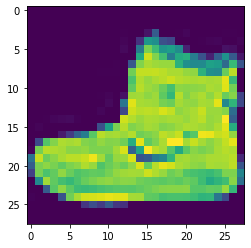

In [4]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0])

In [5]:
import numpy as np

x_train = np.expand_dims(x_train, axis=3)
x_test = np.expand_dims(x_test, axis=3)

In [6]:
x_train.shape

(60000, 28, 28, 1)

In [7]:
datagen = ImageDataGenerator(    
    rotation_range=20,
    horizontal_flip=True)

In [8]:
datagen.fit(x_train)

In [9]:
batches=datagen.flow(x_train, y_train, batch_size=32)

In [10]:
!ls

'ls'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


In [11]:
!mkdir aug

In [12]:
!ls

'ls'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


In [13]:
batches=datagen.flow(x_train, y_train, batch_size=32, save_to_dir='aug')

In [14]:
len(x_train)

60000

In [15]:
len(batches)

1875

In [16]:
!ls aug

'ls'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


In [17]:
x_batch, y_batch = next(batches)

In [18]:
x_batch.shape

(32, 28, 28, 1)

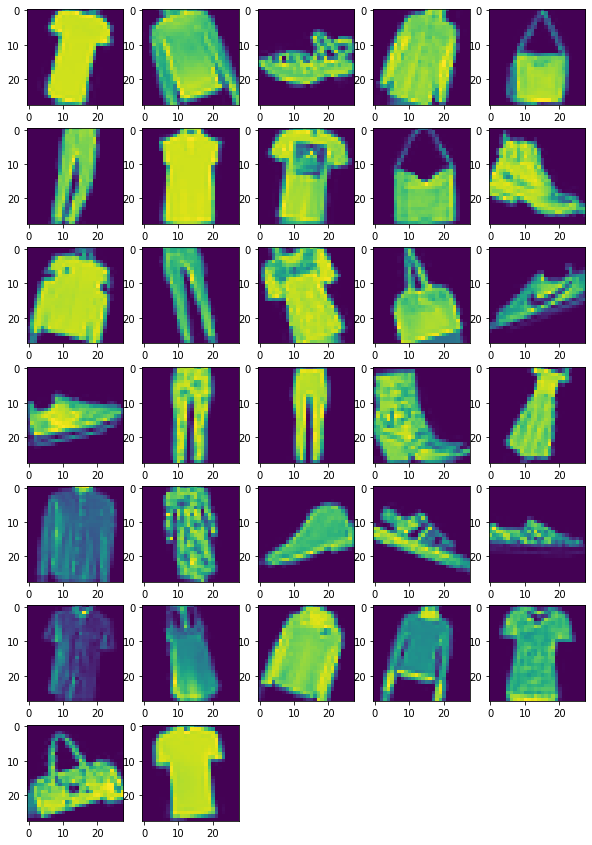

In [19]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,15))

for i in range(32):
    fig.add_subplot(7,5,i+1)
    plt.imshow(x_batch[i,:,:,0])

In [20]:
from tensorflow.keras import layers, models

model = models.Sequential()
model.add(layers.Conv2D(32,(5,5), padding='valid', activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Conv2D(64,(5,5), padding='valid', activation='relu'))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 64)          51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              1049600   
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0

In [21]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [22]:
epochs = 10
histoy = model.fit(datagen.flow(x_train, y_train, batch_size=32),
          epochs=epochs, validation_data=(x_test, y_test))

Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1866/1875 [============================>.] - ETA: 0s - loss: 0.9056 - acc: 0.7312WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x000002595DA92708> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) a